# HIT140 Foundations of Data Science
### How does digital screen time affect your well-being?

1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

2. Load datasets

In [2]:
# Data Loading and Merging
dataset1 = pd.read_csv('dataset1.csv')
dataset2 = pd.read_csv('dataset2.csv')
dataset3 = pd.read_csv('dataset3.csv')

# Display the first few rows of each dataset to verify that they've been loaded correctly
print("Dataset 1:")
print(dataset1.head())

print("\nDataset 2:")
print(dataset2.head())

print("\nDataset 3:")
print(dataset3.head())

Dataset 1:
        ID  gender  minority  deprived
0  1087360       0         0         0
1  1088938       0         1         0
2  1088953       0         1         0
3  1088961       0         1         0
4  1089147       0         1         0

Dataset 2:
        ID  C_we  C_wk  G_we  G_wk  S_we  S_wk  T_we  T_wk
0  1000002   0.5   0.5   0.0   0.0   1.0   0.5   1.0   0.5
1  1000003   1.0   0.5   0.0   0.0   2.0   2.0   3.0   2.0
2  1000004   3.0   1.0   2.0   0.0   3.0   2.0   3.0   2.0
3  1000005   4.0   2.0   0.0   0.0   4.0   3.0   7.0   5.0
4  1000006   1.0   0.5   0.0   0.0   2.0   2.0   1.0   0.5

Dataset 3:
        ID  Optm  Usef  Relx  Intp  Engs  Dealpr  Thcklr  Goodme  Clsep  Conf  \
0  1087360     5     3     2     1     3       5       4       1      5     2   
1  1094049     2     3     3     2     3       1       2       1      5     1   
2  1094067     4     3     4     4     4       4       4       3      4     4   
3  1097484     3     3     3     3     3       3     

3. Prepare combined dataset

In [3]:
# Merge the datasets on 'ID'
merged_data = pd.merge(pd.merge(dataset1, dataset2, on='ID'), dataset3, on='ID')

# Check the available columns in the merged dataset
print("Columns in the merged dataset:")
print(merged_data.columns)

# Check for missing values
print("\nMissing Values in Merged Data:")
print(merged_data.isnull().sum())
merged_data.fillna(merged_data.mean(), inplace=True)

# Save the prepared data
merged_data.to_csv('prepared_data.csv', index=False)

Columns in the merged dataset:
Index(['ID', 'gender', 'minority', 'deprived', 'C_we', 'C_wk', 'G_we', 'G_wk',
       'S_we', 'S_wk', 'T_we', 'T_wk', 'Optm', 'Usef', 'Relx', 'Intp', 'Engs',
       'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved',
       'Intthg', 'Cheer'],
      dtype='object')

Missing Values in Merged Data:
ID          0
gender      0
minority    0
deprived    0
C_we        0
C_wk        0
G_we        0
G_wk        0
S_we        0
S_wk        0
T_we        0
T_wk        0
Optm        0
Usef        0
Relx        0
Intp        0
Engs        0
Dealpr      0
Thcklr      0
Goodme      0
Clsep       0
Conf        0
Mkmind      0
Loved       0
Intthg      0
Cheer       0
dtype: int64


### Deprevation by Gender
##### [ADD DESCRIPTION HERE]

gender
0    0.443188
1    0.425559
Name: deprived, dtype: float64
Depravity by gender
deprived
0    52.144150
1    42.555946
Name: count, dtype: float64


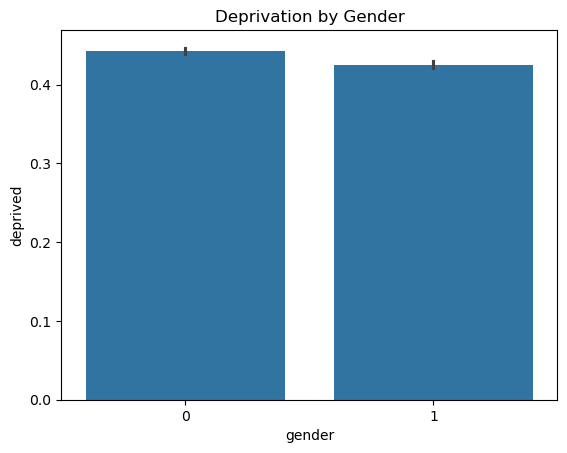

In [4]:
# Read CSV fil
df = pd.read_csv('dataset1.csv')
total_of_gender = df['gender'].value_counts()
total_of_deprived = df['deprived'].value_counts()

#Compare Gender by Deprivation
gender_deprived = df.groupby('gender')['deprived'].mean()
print(gender_deprived)

#Counting total of Gender identifying as Deprived
depravity_by_gender = df[df['gender'] == 1]['deprived'].value_counts()

#Obtaining percentaile of each gender group which idetify as deprived (male=0 female=1)
percentage_depravity_by_gender = (depravity_by_gender / total_of_gender) * 100

print("Depravity by gender")
print(percentage_depravity_by_gender)

# % of genders idetifying as experincing deprivation - Other = 52% && Male = 43%

# Plot for Gender
sns.barplot(x='gender', y='deprived', data=df)
plt.title('Deprivation by Gender')
plt.show()

### Deprevation by Minority
##### [ADD DESCRIPTION HERE]

minority
0    0.367209
1    0.647948
Name: deprived, dtype: float64
Depravity by minority
0    11.163867
1    64.794772
Name: count, dtype: float64


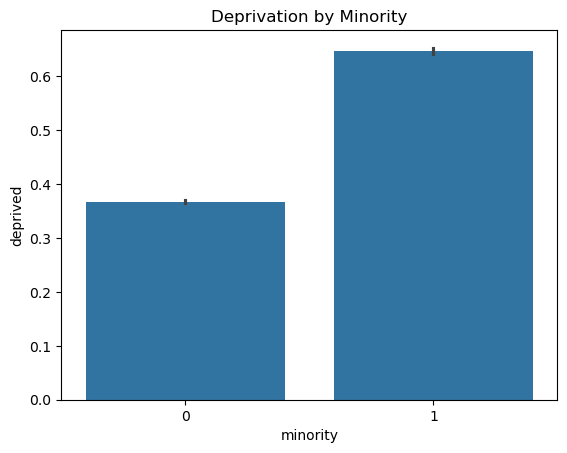

In [5]:
df = pd.read_csv('dataset1.csv')
total_of_deprived = df['deprived'].value_counts()
total_of_minority = df['minority'].value_counts()

#Compare Minority by Deprivation
minority_deprived = df.groupby('minority')['deprived'].mean()
print(minority_deprived)

#Counting total of Minorities identifying as Deprived
depravity_by_minority = df[df['minority'] == 1]['deprived'].value_counts()

#Obtaining percentaile of each gender group which idetify as deprived (male=1 female=0)
percentage_depravity_by_minority = (depravity_by_minority / total_of_minority) * 100

print("Depravity by minority")
print(percentage_depravity_by_minority)

#Estimated percentage of experiencing depravity - majority = 11% && minority = 65% 

# Plot for Minoirty by Deprivation
sns.barplot(x='minority', y='deprived', data=df)
plt.title('Deprivation by Minority')
plt.show()

### Minority by Gender
##### [ADD DESCRIPTION HERE]

minority
0    0.480339
1    0.461565
Name: gender, dtype: float64
gender
0    24.730790
1    23.354855
Name: count, dtype: float64


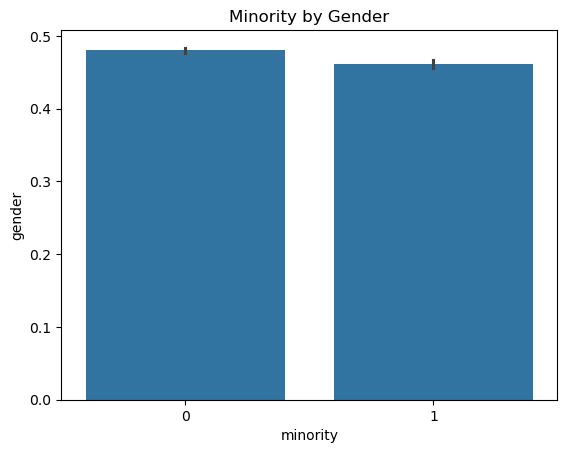

In [6]:
# Read CSV fil
df = pd.read_csv('dataset1.csv')
total_of_gender = df['gender'].value_counts()
total_of_minority = df['minority'].value_counts()

#Compare Minority by Gender and Display in Graph
minority_gender = df.groupby("minority")['gender'].mean()
print(minority_gender)

#Counting number of minorities within each gender
minorities_by_gender = df[df['minority'] == 1]['gender'].value_counts()

#Obtaining percentaile of each gender group which idetify as a minority male=1 other=0
percentage_minority_by_gender = (minorities_by_gender / total_of_gender) * 100
print(percentage_minority_by_gender)

#Estimated gender idetifying as minority ethnic group -- other = 25% && male = 23%

# Plot for Minority by Gender
sns.barplot(x='minority', y='gender', data=df)
plt.title('Minority by Gender')
plt.show()

### Gaming Usage
##### [ADD DESCRIPTION HERE]

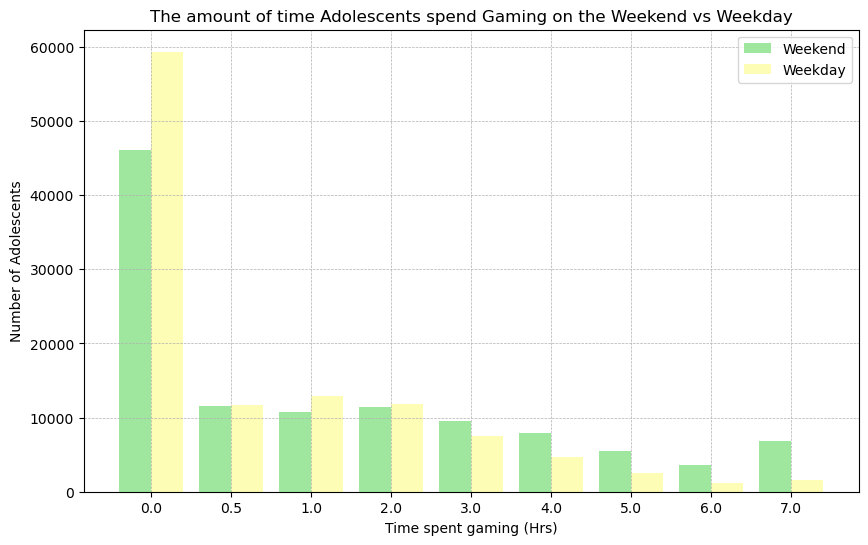

In [7]:
df = pd.read_csv('dataset2.csv')

# Aggregating the data
weekend_usage = df['G_we'].value_counts().sort_index()
weekday_usage = df['G_wk'].value_counts().sort_index()
x = np.arange(len(weekend_usage))

# Width of the bars
width = 0.4

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, weekend_usage.values, width=width, color='#77DD77', alpha=0.7, label='Weekend')
plt.bar(x + width/2, weekday_usage.values, width=width, color='#FDFD96', alpha=0.7, label='Weekday')

# Adding titles, adjusting gridline, creating graph
plt.xlabel('Time spent gaming (Hrs)')
plt.ylabel('Number of Adolescents')
plt.title('The amount of time Adolescents spend Gaming on the Weekend vs Weekday')
plt.xticks(x, weekend_usage.index)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### Smartphone Usage
##### [ADD DESCRIPTION HERE]

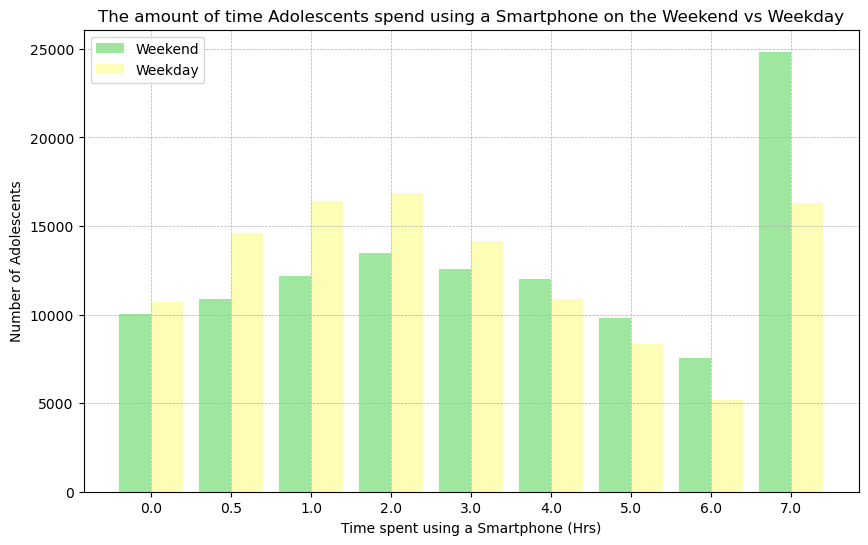

In [8]:
df = pd.read_csv('dataset2.csv')

# Aggregating the data
weekend_usage = df['S_we'].value_counts().sort_index()
weekday_usage = df['S_wk'].value_counts().sort_index()
x = np.arange(len(weekend_usage))

# width of the bars
width = 0.4

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, weekend_usage.values, width=width, color='#77DD77', alpha=0.7, label='Weekend')
plt.bar(x + width/2, weekday_usage.values, width=width, color='#FDFD96', alpha=0.7, label='Weekday')

# Adding titles, adjusting gridline, creating graph
plt.xlabel('Time spent using a Smartphone (Hrs)')
plt.ylabel('Number of Adolescents')
plt.title('The amount of time Adolescents spend using a Smartphone on the Weekend vs Weekday')
plt.xticks(x, weekend_usage.index)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


### Technology Usage During the Week
##### [ADD DESCRIPTION HERE]

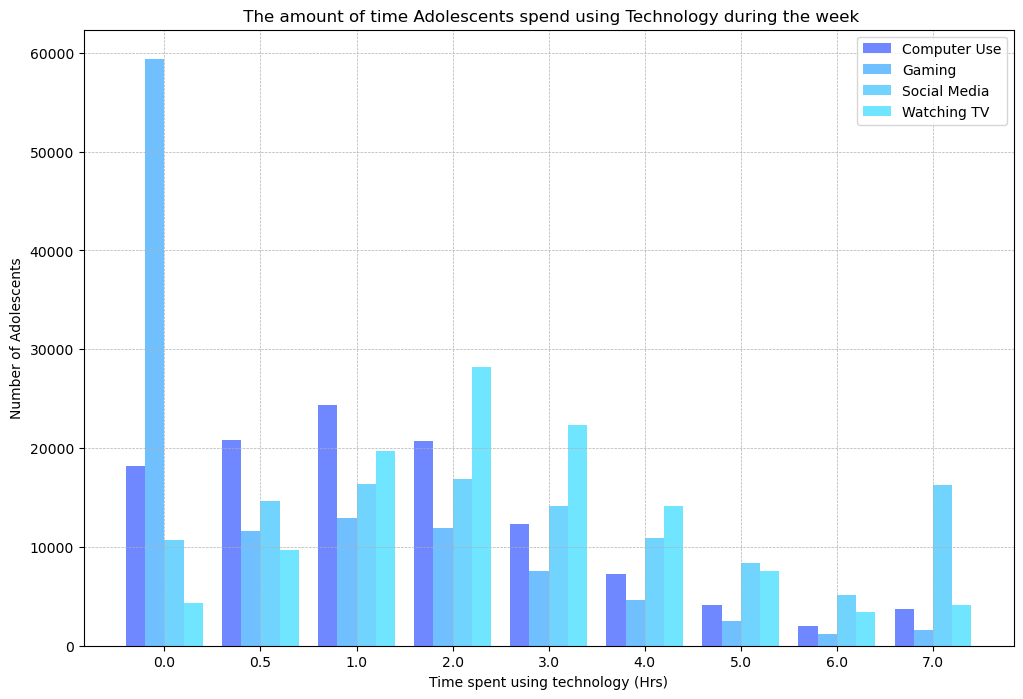

In [9]:
# Read CSV file
df = pd.read_csv('dataset2.csv')

# Aggregating data 
week_usage = {
    'C_wk': df['C_wk'].value_counts().sort_index(),
    'G_wk': df['G_wk'].value_counts().sort_index(),
    'S_wk': df['S_wk'].value_counts().sort_index(),
    'T_wk': df['T_wk'].value_counts().sort_index()
}
x = np.arange(len(week_usage))

#defining width
width = 0.2

#defining colours to customise the colour of the bars 
week_colours = {
    'C_wk': '#3356ff',
    'G_wk': '#33a4ff',
    'S_wk': '#33c2ff',
    'T_wk': '#33daff'
}

#defining legend to adjust labels of graph bars 
week_legend_labels = {
    'C_wk': 'Computer Use',
    'G_wk': 'Gaming',
    'S_wk': 'Social Media',
    'T_wk': 'Watching TV'
}

# Adjusting graph size, 
plt.figure(figsize = (12, 8))
for i, (key, value) in enumerate(week_usage.items()):
    x = np.arange(len(value))
    plt.bar(x + i*0.2, value.values, width=0.2, alpha=0.7, label=week_legend_labels[key], color=week_colours[key])

plt.xlabel('Time spent using technology (Hrs)')
plt.ylabel('Number of Adolescents')
plt.title(" The amount of time Adolescents spend using Technology during the week")
plt.xticks(x + 0.3, value.index)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### Technology Usage During the Weekend
##### [ADD DESCRIPTION HERE]

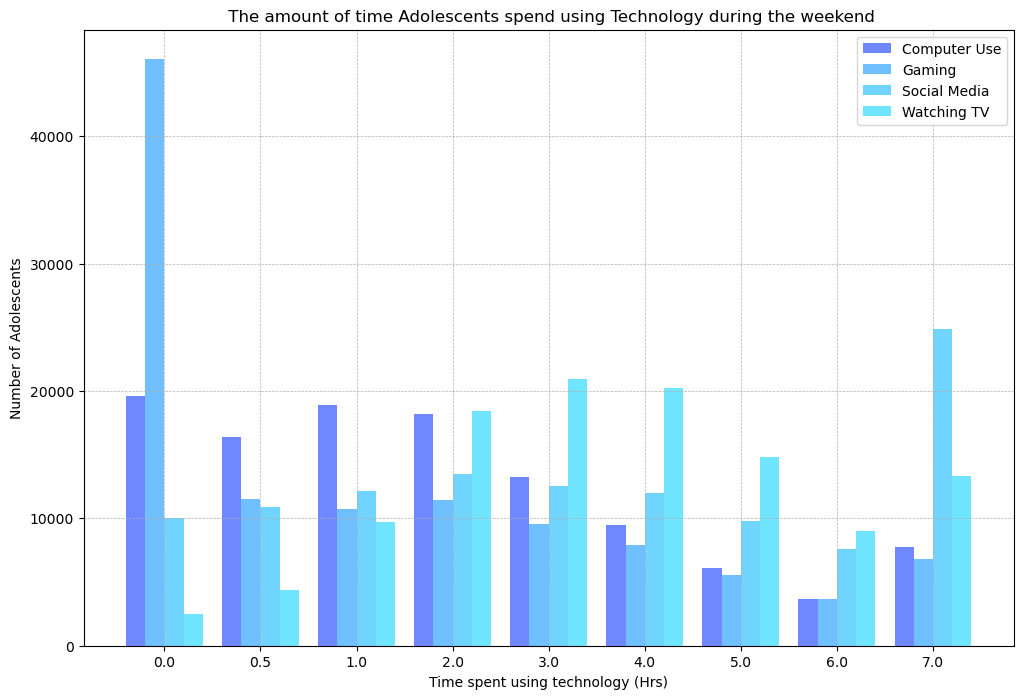

In [10]:
# Read the CSV file
df = pd.read_csv('dataset2.csv')

# Aggregate the data for the weekend
weekend_usage = {
    'C_we': df['C_we'].value_counts().sort_index(),
    'G_we': df['G_we'].value_counts().sort_index(),
    'S_we': df['S_we'].value_counts().sort_index(),
    'T_we': df['T_we'].value_counts().sort_index()
}

x = np.arange(len(weekend_usage))

# Defining colours to customise the colour of the bars 
weekend_colours = {
    'C_we': '#3356ff',
    'G_we': '#33a4ff',
    'S_we': '#33c2ff',
    'T_we': '#33daff'
}

# Defining legend to adjust labels of the graph bars 
weekend_legend_labels = {
    'C_we': 'Computer Use',
    'G_we': 'Gaming',
    'S_we': 'Social Media',
    'T_we': 'Watching TV'
}

# Adjusting graph size etc.
plt.figure(figsize = (12, 8))
for i, (key, value) in enumerate(weekend_usage.items()):
    x = np.arange(len(value))
    plt.bar(x + i*0.2, value.values, width=0.2, alpha=0.7, label=weekend_legend_labels[key], color=weekend_colours[key])

# Labelling graph and printing
plt.xlabel('Time spent using technology (Hrs)')
plt.ylabel('Number of Adolescents')
plt.title(" The amount of time Adolescents spend using Technology during the weekend")
plt.xticks(x + 0.3, value.index)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


### Weekend vs Weekday Usage
##### Inferential Analysis

The modern technological landscape is dominated by consumption of various media across gaming and television. In the following inferential analysis, we propose that the amount of time adolescents spend on technology during the week has little to no significant difference compared to use during the weekend.

##### 1. Hypothesis

For this analysis, we define the null hypothesis as "there is no significant differnece in technology use during the week and weekend". The alternate hypothesis will hence be defined as "there are significant difference in technology use during the week and weekend". Additionally, we will define the alpha value to be 0.01.

##### 2. Hypothesis Testing

To test the hypothesis, we first extract the hours spent per individual for both weekend and weekday consumption into five separate categories of computer, TV, social media, gaming and total (where total is the combined hours spent across all aforementioned technologies).

In [11]:
# Drop id column
data = dataset2.drop(columns=['ID'])

# Create randomly sampled NumPy arrays for each column
groups = { col: np.random.choice(data[col].to_numpy(), size=100, replace=False) for col in data.columns }

# Define weekday consumptions
computer_wk = groups['C_wk']
tv_wk =  groups['T_wk']
social_wk = groups['S_wk']
gaming_wk = groups['G_wk']
total_wk = np.concatenate((computer_wk, tv_wk, social_wk, gaming_wk))

# Define weekend consumptions
computer_we = groups['C_we']
tv_we =  groups['T_we']
social_we = groups['S_we']
gaming_we = groups['G_we']
total_we = np.concatenate((computer_we, tv_we, social_we, gaming_we))

print("Weekday Consumption per Individual")
print("----------------------------------")
print('computer:', computer_wk)
print('tv:', tv_wk)
print('social media:', social_wk)
print('gaming:', gaming_wk)
print('total:', total_wk)

print()

print("Weekend Consumption per Individual")
print("----------------------------------")
print('computer:', computer_we)
print('tv:', tv_we)
print('social media:', social_we)
print('gaming:', gaming_we)
print('total:', total_we)

Weekday Consumption per Individual
----------------------------------
computer: [0.  1.  0.  1.  0.5 2.  1.  2.  7.  2.  0.5 0.5 1.  3.  0.  1.  0.5 1.
 3.  4.  0.  4.  1.  2.  0.5 0.5 0.  1.  4.  0.  0.5 1.  1.  2.  3.  4.
 0.5 0.5 5.  1.  4.  3.  1.  1.  7.  0.  0.5 0.  1.  0.  2.  2.  0.5 0.5
 1.  2.  4.  1.  0.5 0.5 4.  2.  0.  1.  5.  3.  0.  0.5 0.5 1.  0.5 5.
 0.5 3.  0.  0.  2.  0.5 2.  2.  2.  2.  0.5 3.  1.  1.  0.5 1.  7.  4.
 0.5 2.  0.  1.  0.  2.  5.  3.  0.5 1. ]
tv: [3.  5.  7.  3.  2.  2.  2.  7.  4.  3.  2.  2.  2.  1.  2.  3.  7.  2.
 1.  7.  3.  2.  3.  0.  5.  3.  0.5 0.5 3.  1.  3.  3.  3.  3.  4.  2.
 0.5 0.5 3.  2.  4.  4.  3.  2.  2.  1.  4.  1.  5.  2.  2.  7.  0.5 1.
 5.  4.  1.  6.  3.  1.  2.  1.  4.  1.  7.  6.  6.  2.  2.  3.  1.  2.
 0.  4.  4.  7.  3.  7.  0.5 4.  2.  3.  0.5 2.  0.5 3.  4.  7.  3.  3.
 1.  2.  2.  2.  2.  4.  3.  5.  3.  3. ]
social media: [1.  1.  1.  4.  3.  3.  7.  2.  7.  3.  2.  4.  2.  3.  2.  4.  3.  0.
 2.  6.  0.5 0.5 0.5 2.  

Using the weekday and weekend data groups, we can run a two sample t-test with equal variance to determine any correlation between each scenario.

In [12]:
# Perform the two sample t-tests with equal variances

# Computer use
print("Computer Consumption")
print("--------------------")
print(stats.ttest_ind(a=computer_we, b=computer_wk, equal_var=True), '\n')

# TV use
print("TV Consumption")
print("--------------------")
print(stats.ttest_ind(a=tv_we, b=tv_wk, equal_var=True), '\n')

# Social Media use
print("Social Media Consumption")
print("--------------------")
print(stats.ttest_ind(a=social_we, b=social_wk, equal_var=True), '\n')

# Gaming use
print("Gaming Consumption")
print("--------------------")
print(stats.ttest_ind(a=gaming_we, b=gaming_wk, equal_var=True), '\n')

# total use
print("Total Consumption")
print("--------------------")
print(stats.ttest_ind(a=total_we, b=total_wk, equal_var=True), '\n')

Computer Consumption
--------------------
TtestResult(statistic=2.771951369357951, pvalue=0.006103728734230836, df=198.0) 

TV Consumption
--------------------
TtestResult(statistic=2.8361940688037843, pvalue=0.00503987933125291, df=198.0) 

Social Media Consumption
--------------------
TtestResult(statistic=1.2853937059456564, pvalue=0.20015616437605366, df=198.0) 

Gaming Consumption
--------------------
TtestResult(statistic=2.432247737648411, pvalue=0.015894489048765205, df=198.0) 

Total Consumption
--------------------
TtestResult(statistic=4.1916167252510865, pvalue=3.079414898563018e-05, df=798.0) 



##### 3. Discussion and Conclusion

As shown in the two sample t-test, it can bee seen that the p values of all categories across computer, tv, social media, gaming and total usage all have a p-value of less than 0.01. Since the p-value is less than the alpha value, it can be determined that the null hypothesis has been rejected in favour of the alternate hypothesis. Therefore, there is sufficient evidence that there is a signficant difference in consumption across all categories between weekend and weekday use despite the visual similarities in their respective charts.